# neural network classification with TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples=1000

# Create circles
X, y= make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X # Check out features

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10] # Check the labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
#visualize features and labels using pandas
circles= pd.DataFrame({"X0" :X[:,0], "X1": X[:,1], "label":y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


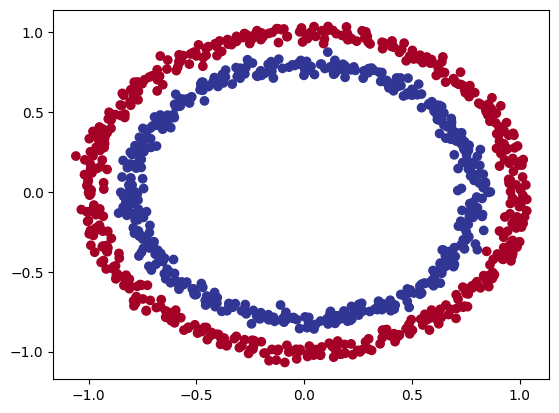

In [ ]:
#Visualize with a plot

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shapes of features and labels
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
X[992], y[992] # How many samples we're working with

(array([0.96859653, 0.20977483]), 0)

# Classification Model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(100))
model1.add(tf.keras.layers.Dense(10))
model1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="sgd", metrics="accuracy")

# 3. Fit the model
model1.fit(tf.expand_dims(X, -1), y, epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 9ms/step - loss: 7.6218 - accuracy: 0.4940
Epoch 2/10
32/32 [==============================] - 0s 10ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000


## Improving the model

In [ ]:
tf.random.set_seed(42)

# 1. Create a model, this time with 3 layers
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(128, activation="relu"))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics="accuracy")

# 3. Fit the model
model2.fit(X, y, epochs=12)

Epoch 1/12
32/32 [==============================] - 2s 5ms/step - loss: 0.6916 - accuracy: 0.5050
Epoch 2/12
32/32 [==============================] - 0s 10ms/step - loss: 0.6846 - accuracy: 0.5000
Epoch 3/12
32/32 [==============================] - 0s 8ms/step - loss: 0.6761 - accuracy: 0.5000
Epoch 4/12
32/32 [==============================] - 0s 8ms/step - loss: 0.6642 - accuracy: 0.6200
Epoch 5/12
32/32 [==============================] - 0s 5ms/step - loss: 0.6438 - accuracy: 0.6350
Epoch 6/12
32/32 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.7710
Epoch 7/12
32/32 [==============================] - 0s 10ms/step - loss: 0.5645 - accuracy: 0.8880
Epoch 8/12
32/32 [==============================] - 0s 10ms/step - loss: 0.4899 - accuracy: 0.9670
Epoch 9/12
32/32 [==============================] - 0s 9ms/step - loss: 0.4098 - accuracy: 0.9860
Epoch 10/12
32/32 [==============================] - 0s 8ms/step - loss: 0.3215 - accuracy: 0.9960
Epoch 11/12
32/3

## Visualize predictions

In [ ]:
def plot_decision_boundary(model, X, y):
 """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
    # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max=X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max=X[:,1].min()-0.1, X[:,1].max()+0.1

  xx, yy=np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  # Create X values to predict on
  x_in=np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred=model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0])>1:
    print("Doing Multiclass Classification")
    y_pred=np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 2s 4ms/step
Doing binary classification


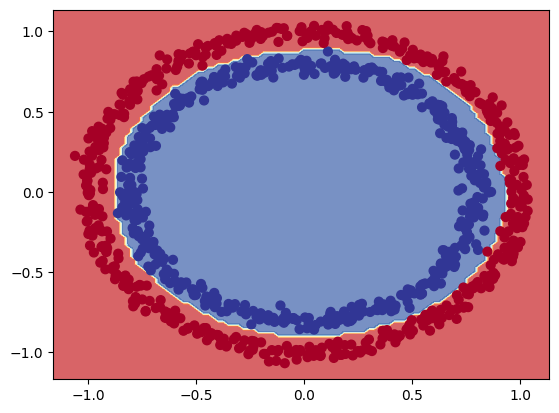

In [ ]:
# Check decision boundary

plot_decision_boundary(model2, X, y)

313/313 [==============================] - 1s 1ms/step
Doing Multiclass Classification


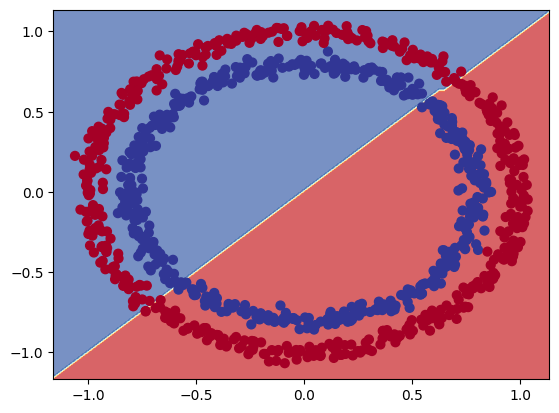

In [ ]:
plot_decision_boundary(model1, X, y)

In [ ]:
# Lets see if the model 1 works for a regression problem

tf.random.set_seed(42)
# Create some regression data
X_reg=tf.range(0, 1000, 5)
y_reg=tf.range(100, 1100, 5)

X_reg, y_reg

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
tf.random.set_seed(42)

model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(100))
model1.add(tf.keras.layers.Dense(10))
model1.add(tf.keras.layers.Dense(1))


model1.compile(loss=tf.keras.losses.mae, optimizer="adam", metrics="mae")



In [ ]:
# Split our regression data into training and test sets
X_reg_train= X_reg[:150]
X_reg_test= X_reg[150:]

y_reg_train= y_reg[:150]
y_reg_test= y_reg[150:]

# Fit model to the regression data
model1.fit(tf.expand_dims(X_reg_train, -1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 407.8397 - mae: 407.8397
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 310.0657 - mae: 310.0657
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 215.0251 - mae: 215.0251
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 114.8216 - mae: 114.8216
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 48.2396 - mae: 48.2396
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 78.3168 - mae: 78.3168
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 68.8352 - mae: 68.8352
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 44.7393 - mae: 44.7393
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.0046 - mae: 49.0046
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.0576 - mae: 43.0576
Epoch 11/100
5/5 [==============================] -

In [ ]:
y_reg_preds=model1.predict(X_reg_test) # Make predictions with our trained model

2/2 [==============================] - 0s 6ms/step


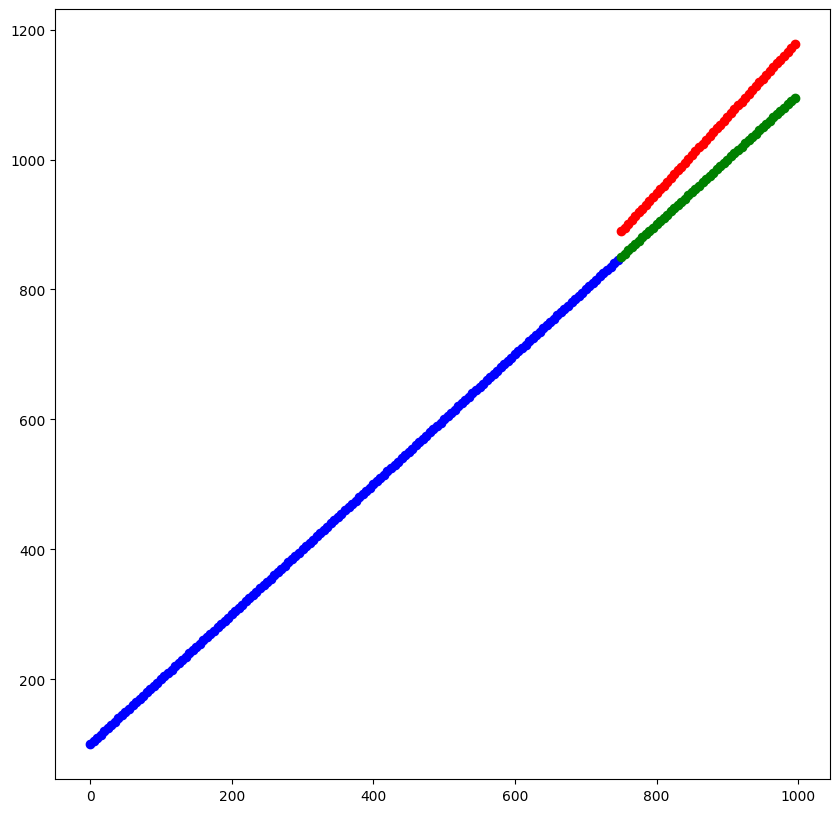

In [ ]:
# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 10))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="predictions")

# Non-Linearity

In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.models.Sequential()
model_4.add(tf.keras.layers.Dense(1, activation="linear"))

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics="accuracy")

history= model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9558 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9411 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9285 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9156 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8763 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8051 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7994 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7867 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7819 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7790 - accuracy: 0.4840
Epoch 11/

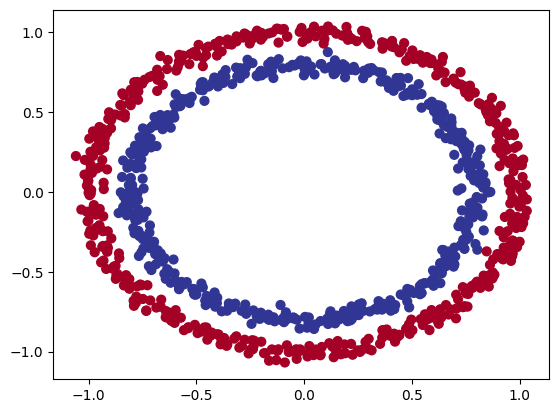

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


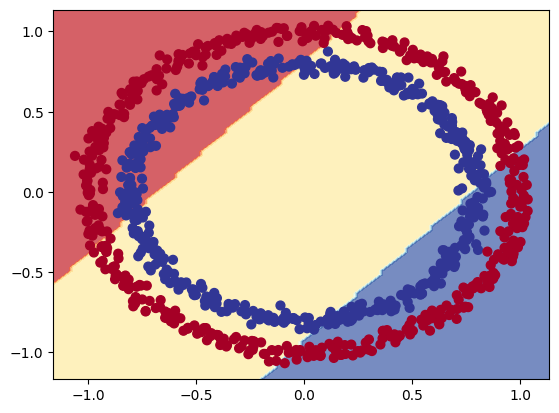

In [ ]:
plot_decision_boundary(model_4, X, y) # Check the decision boundary for our latest model

In [ ]:
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5=tf.keras.models.Sequential()
model_5.add(tf.keras.layers.Dense(4, activation="relu"))
model_5.add(tf.keras.layers.Dense(4, activation="relu"))
model_5.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics="accuracy")

# 3. Fit the model
history= model_5.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4940
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5010
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4990
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5020
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5010
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.4850
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5120
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5170
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5450
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5750
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Doing binary classification


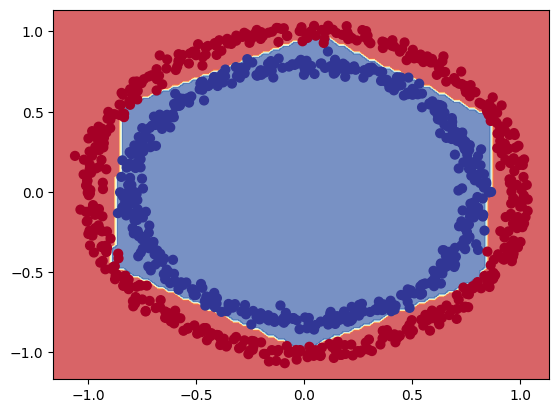

In [ ]:
plot_decision_boundary(model_5, X, y)

## Evaluating and improving our model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42) # Split into train and test sets

In [ ]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
y_train.shape, y_test.shape

((800,), (200,))

In [ ]:
tf.random.set_seed(42)

# 1. Create the model (same as model_5)
model_6=tf.keras.models.Sequential()
model_6.add(tf.keras.layers.Dense(4, activation="relu"))
model_6.add(tf.keras.layers.Dense(4, activation="relu"))
model_6.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics="accuracy")

# 3. Fit the model
history= model_6.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6856 - accuracy: 0.5288
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5838
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.5938
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6162
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6112
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.7362
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.7350
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5604 - accuracy: 0.7788
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7887
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.8000
Epoch 11/25
25/25 [

In [ ]:
model_6.evaluate(X_test, y_test) # 4. Evaluate the model on the test dataset

7/7 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9850


[0.14695370197296143, 0.9850000143051147]

In [ ]:
model_6_preds=model_6.predict(X_test)

7/7 [==============================] - 0s 2ms/step


313/313 [==============================] - 1s 2ms/step
Doing binary classification


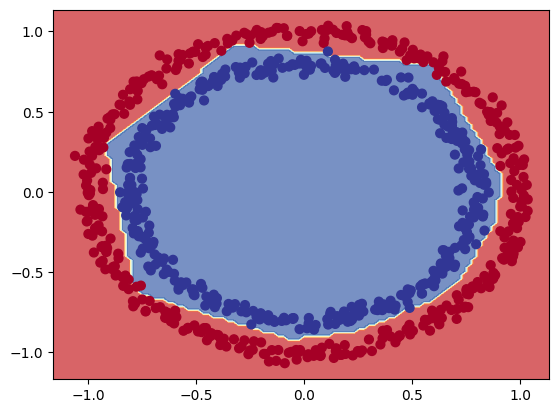

In [ ]:
plot_decision_boundary(model_6, X_train, y_train) # Plot the decision boundaries for the training set

313/313 [==============================] - 0s 1ms/step
Doing binary classification


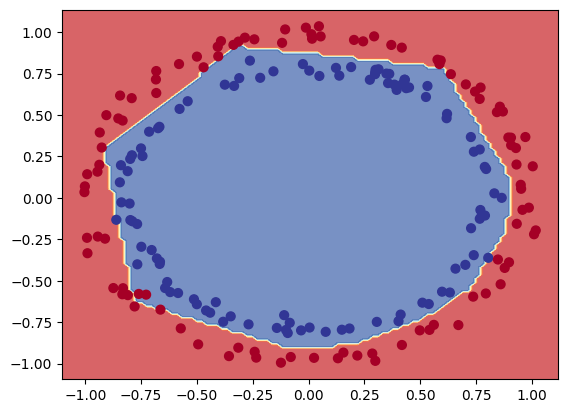

In [ ]:
plot_decision_boundary(model_6, X_test, y_test) # Plot the decision boundaries for the test set

## Visualize Training History

<Axes: >

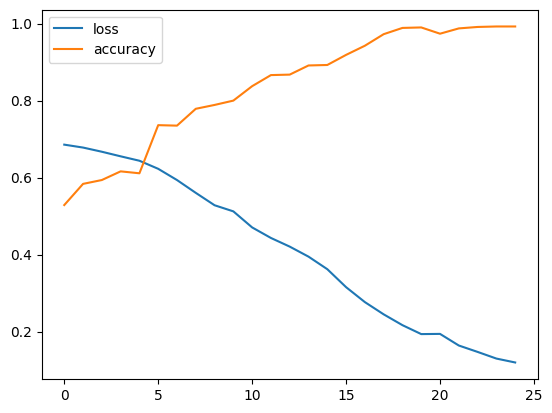

In [ ]:
pd.DataFrame(history.history).plot() # Convert the history object into a DataFrame and plot it

## Finding the best Learning Rate

* Callbacks (learning rate)

In [ ]:
tf.random.set_seed(42)

# Create a model (same as model_6)
model_7=tf.keras.models.Sequential()
model_7.add(tf.keras.layers.Dense(4, activation="relu"))
model_7.add(tf.keras.layers.Dense(4, activation="relu"))
model_7.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics="accuracy")

# Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_7= model_7.fit(X_train, y_train, epochs=100, callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6993 - accuracy: 0.4863 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4850 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4850 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4837 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4812 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4837 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4863 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4863 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: >

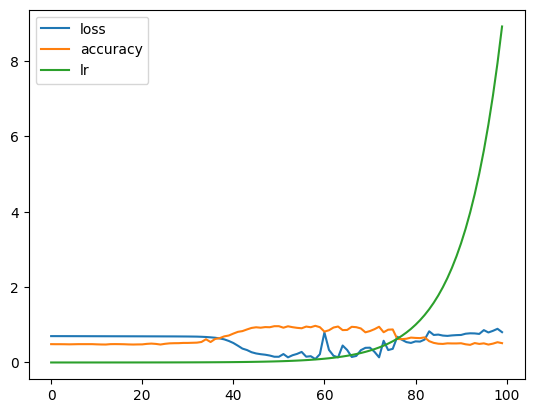

In [ ]:
pd.DataFrame(history_7.history).plot() # Checkout the history

In [ ]:
history_7.history["lr"]

[1e-04,
 0.000112201844,
 0.00012589255,
 0.00014125375,
 0.00015848932,
 0.00017782794,
 0.00019952623,
 0.00022387212,
 0.00025118864,
 0.0002818383,
 0.00031622776,
 0.00035481338,
 0.00039810716,
 0.00044668358,
 0.0005011872,
 0.0005623413,
 0.00063095737,
 0.0007079458,
 0.0007943282,
 0.00089125097,
 0.001,
 0.0011220184,
 0.0012589254,
 0.0014125375,
 0.0015848932,
 0.0017782794,
 0.0019952622,
 0.0022387211,
 0.0025118864,
 0.002818383,
 0.0031622776,
 0.003548134,
 0.0039810715,
 0.004466836,
 0.0050118724,
 0.0056234132,
 0.0063095735,
 0.007079458,
 0.007943282,
 0.008912509,
 0.01,
 0.011220184,
 0.012589254,
 0.014125375,
 0.015848933,
 0.017782794,
 0.019952623,
 0.022387212,
 0.025118865,
 0.028183829,
 0.031622775,
 0.035481337,
 0.039810717,
 0.044668358,
 0.050118722,
 0.056234132,
 0.06309573,
 0.070794575,
 0.07943282,
 0.0891251,
 0.1,
 0.11220185,
 0.12589253,
 0.14125375,
 0.15848932,
 0.17782794,
 0.19952624,
 0.22387211,
 0.25118864,
 0.2818383,
 0.31622776,
 

Text(0, 0.5, 'Loss')

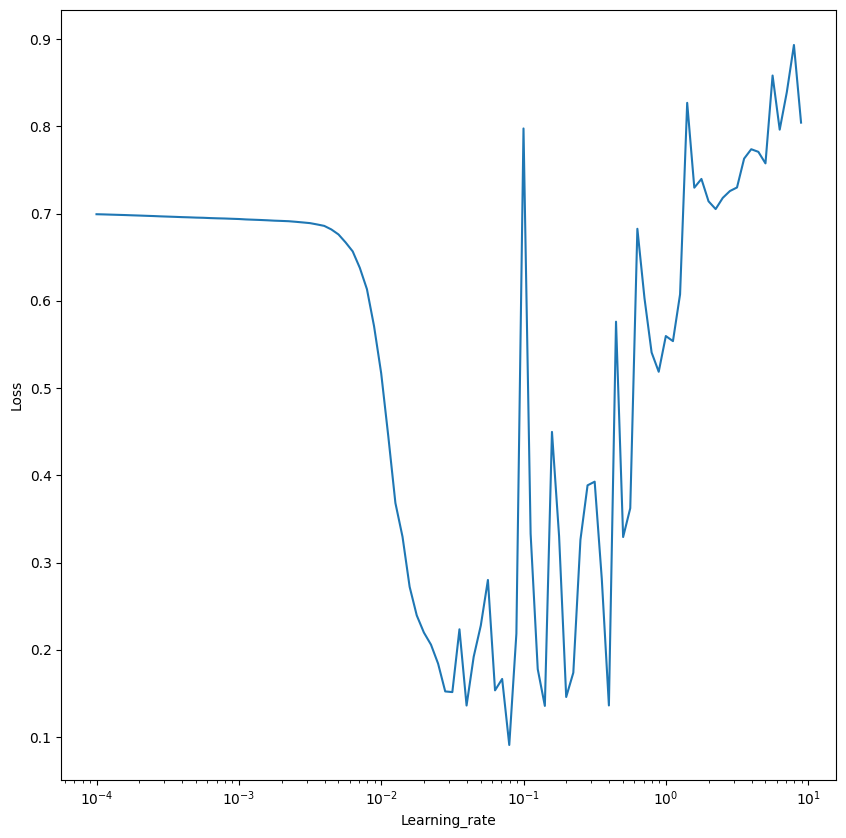

In [ ]:
# Plot the learning rate versus the loss
lrs=1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,10))
plt.semilogx(history_7.history["lr"], history_7.history["loss"])
plt.xlabel("Learning_rate")
plt.ylabel("Loss")

In [ ]:
# using a higher *ideal* learning rate with the same model as before
tf.random.set_seed(42)

model_8=tf.keras.models.Sequential()
model_8.add(tf.keras.layers.Dense(4, activation="relu"))
model_8.add(tf.keras.layers.Dense(4, activation="relu"))
model_8.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), metrics="accuracy")

history_8= model_8.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5050
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5188
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5550
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.5975
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.5713
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6513
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7300
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7962
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.8350
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.9675
Epoch 11/20
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test) # Evaluate model 8 on the test dataset

7/7 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9700


[0.09756425768136978, 0.9700000286102295]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


Text(0.5, 1.0, 'Testing')

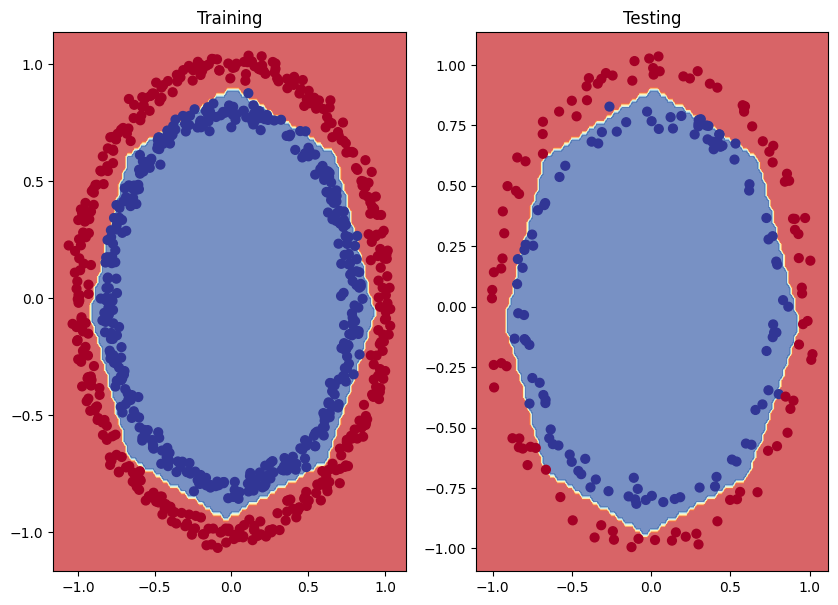

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_8, X_train, y_train)
plt.title("Training")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_8, X_test, y_test)
plt.title("Testing")

## Confusion Matrix

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds8= model_8.predict(X_test)

# Create confusion matrix
tf.round(y_preds8)[:10]



7/7 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
cm=confusion_matrix(y_test, tf.round(y_preds8))


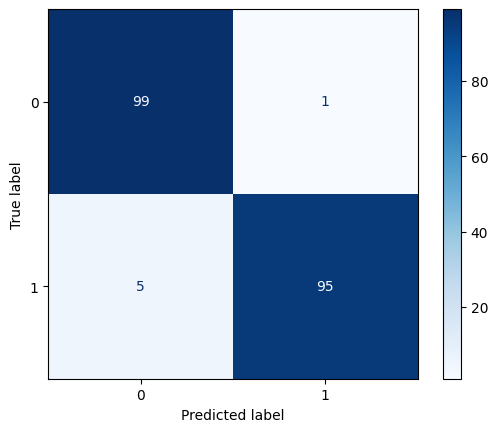

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot(cmap="Blues")

# Working with a larger example (multiclass)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0] # Show the first training example

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_labels[0]

9

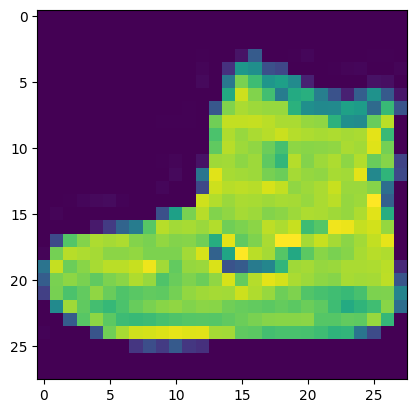

In [ ]:
# Plot a single sample
plt.imshow(train_data[0])

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress",
        "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Trouser')

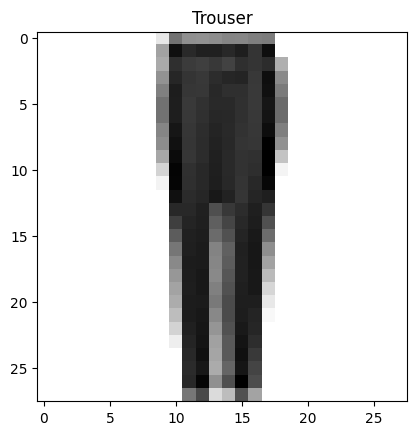

In [ ]:
#plot an example

plt.imshow(train_data[20123], cmap=plt.cm.binary)
plt.title(class_names[train_labels[20123]])

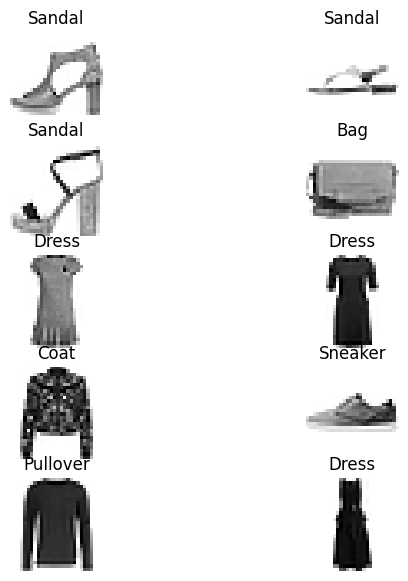

In [ ]:
# plot multiple random images of fashion mnist

import random
plt.figure(figsize=(7,7))

for i in range(10):
  ax=plt.subplot(5, 2, i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

# Create the model
model_c1=tf.keras.models.Sequential()
model_c1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_c1.add(tf.keras.layers.Dense(4, activation="relu"))
model_c1.add(tf.keras.layers.Dense(4, activation="relu"))
model_c1.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compile the model
model_c1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics="accuracy")

# Fit the model
history=model_c1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


In [ ]:
tf.random.set_seed(42)

model_c2=tf.keras.models.Sequential()
model_c2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_c2.add(tf.keras.layers.Dense(128, activation="relu"))
model_c2.add(tf.keras.layers.Dense(64, activation="relu"))
model_c2.add(tf.keras.layers.Dense(10, activation="softmax"))

model_c2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics="accuracy")

history=model_c2.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2762 - accuracy: 0.7559 - val_loss: 0.6381 - val_accuracy: 0.7915
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5785 - accuracy: 0.8097 - val_loss: 0.6137 - val_accuracy: 0.8050
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5391 - accuracy: 0.8188 - val_loss: 0.5672 - val_accuracy: 0.8074
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5028 - accuracy: 0.8276 - val_loss: 0.5628 - val_accuracy: 0.8038
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4703 - accuracy: 0.8353 - val_loss: 0.5117 - val_accuracy: 0.8139
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4460 - accuracy: 0.8418 - val_loss: 0.5087 - val_accuracy: 0.8136
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4244 - accuracy: 0.8496 - val_loss: 0.4686 - val_accuracy:

In [ ]:
predictions2=model_c2.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [ ]:
tf.argmax(predictions2, axis=1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

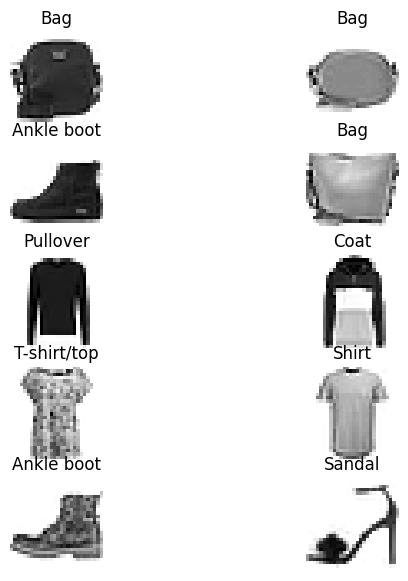

In [ ]:
#plot predictions against images
plt.figure(figsize=(7, 7))
for i in range(10):
  ax=plt.subplot(5, 2, i+1)
  rand_index=random.choice(range(len(test_data)))
  plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[tf.argmax(predictions2, axis=1)[rand_index]])
  plt.axis(False)

## normalize data

In [ ]:
# get the training and testing data between 0 & 1 by dividing by the maximum
train_data_norm=train_data/(train_data.max())
test_data_norm=test_data/(test_data.max())

In [ ]:
train_data_norm.min(), train_data_norm.max() # check the min and max values of the scaled training data

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

# Create a model (same as model_c1)
model_c3=tf.keras.models.Sequential()
model_c3.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_c3.add(tf.keras.layers.Dense(4, activation="relu"))
model_c3.add(tf.keras.layers.Dense(4, activation="relu"))
model_c3.add(tf.keras.layers.Dense(10, activation="softmax"))

model_c3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics="accuracy")

history_norm=model_c3.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.5640 - accuracy: 0.3749 - val_loss: 1.3621 - val_accuracy: 0.4468
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1860 - accuracy: 0.5247 - val_loss: 1.0240 - val_accuracy: 0.5906
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9336 - accuracy: 0.6261 - val_loss: 0.8939 - val_accuracy: 0.6642
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8321 - accuracy: 0.6842 - val_loss: 0.8201 - val_accuracy: 0.7035
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7864 - accuracy: 0.7075 - val_loss: 0.8038 - val_accuracy: 0.7093
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7611 - accuracy: 0.7202 - val_loss: 0.8037 - val_accuracy: 0.7144
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7457 - accuracy: 0.7307 - val_loss: 0.7754 - val_accuracy:

Text(0.5, 1.0, 'normalized Training Loss')

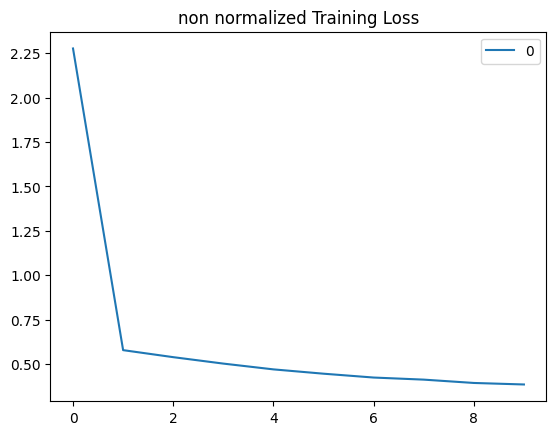

<Figure size 640x480 with 0 Axes>

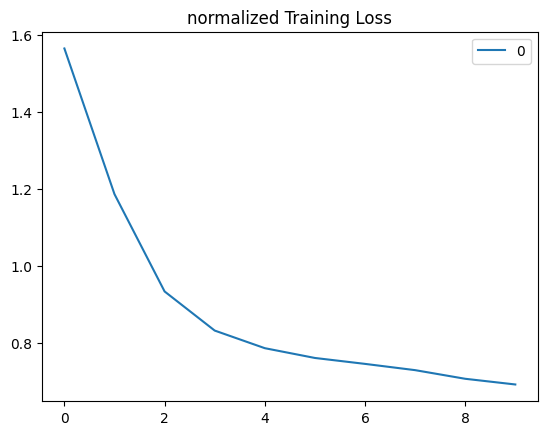

In [ ]:
# Plot non-normalized data loss curves
pd.DataFrame(history.history["loss"]).plot(label="Loss")
plt.title("non normalized Training Loss")

# Plot normalized data loss curves
plt.figure()
pd.DataFrame(history_norm.history["loss"]).plot(label="Loss")
plt.title("normalized Training Loss")


## Finding the ideal learning rate


In [ ]:
tf.random.set_seed(42)

model_c4=tf.keras.models.Sequential()
model_c4.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_c4.add(tf.keras.layers.Dense(4, activation="relu"))
model_c4.add(tf.keras.layers.Dense(4, activation="relu"))
model_c4.add(tf.keras.layers.Dense(10, activation="softmax"))

model_c4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics="accuracy")

# Create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_norm2=model_c4.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks= lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5528 - accuracy: 0.4085 - val_loss: 1.1603 - val_accuracy: 0.5364 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0649 - accuracy: 0.5832 - val_loss: 0.9767 - val_accuracy: 0.6480 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8906 - accuracy: 0.6668 - val_loss: 0.8530 - val_accuracy: 0.6974 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7947 - accuracy: 0.7084 - val_loss: 0.7739 - val_accuracy: 0.7285 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7308 - accuracy: 0.7406 - val_loss: 0.7178 - val_accuracy: 0.7547 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6831 - accuracy: 0.7638 - val_loss: 0.7585 - val_accuracy: 0.7483 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0, 0.5, 'Loss')

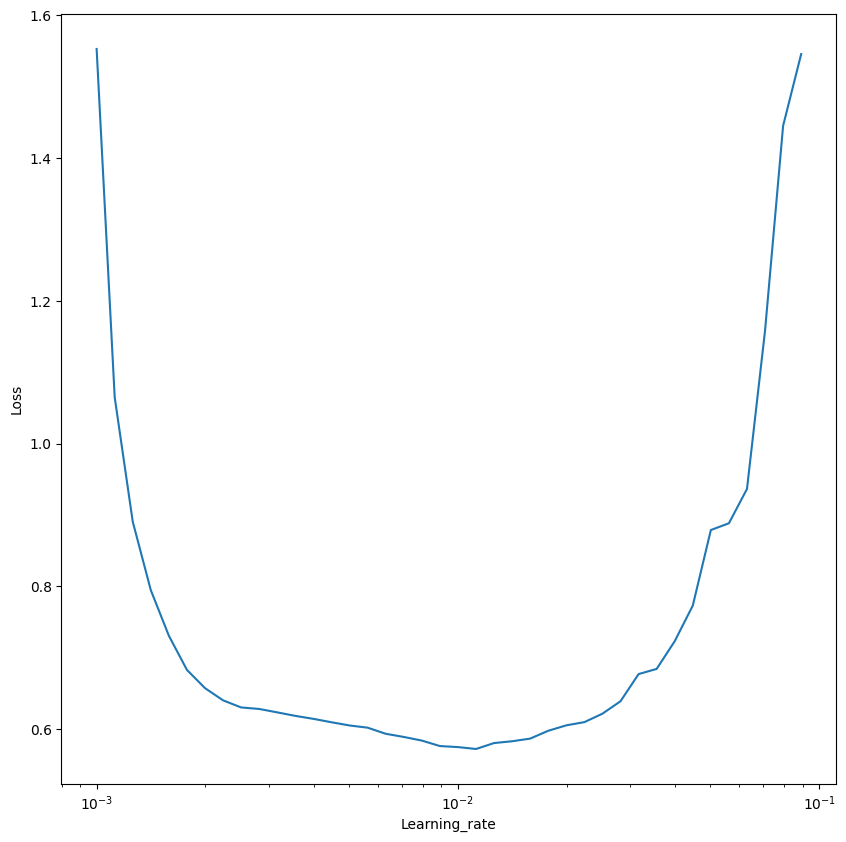

In [ ]:
# Plot the learning rate decay curve
lrs=1e-3 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,10))
plt.semilogx(history_norm2.history["lr"], history_norm2.history["loss"])
plt.xlabel("Learning_rate")
plt.ylabel("Loss")

## Evluating our model

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [ ]:
cm=confusion_matrix(test_labels, tf.argmax(predictions2, axis= 1))


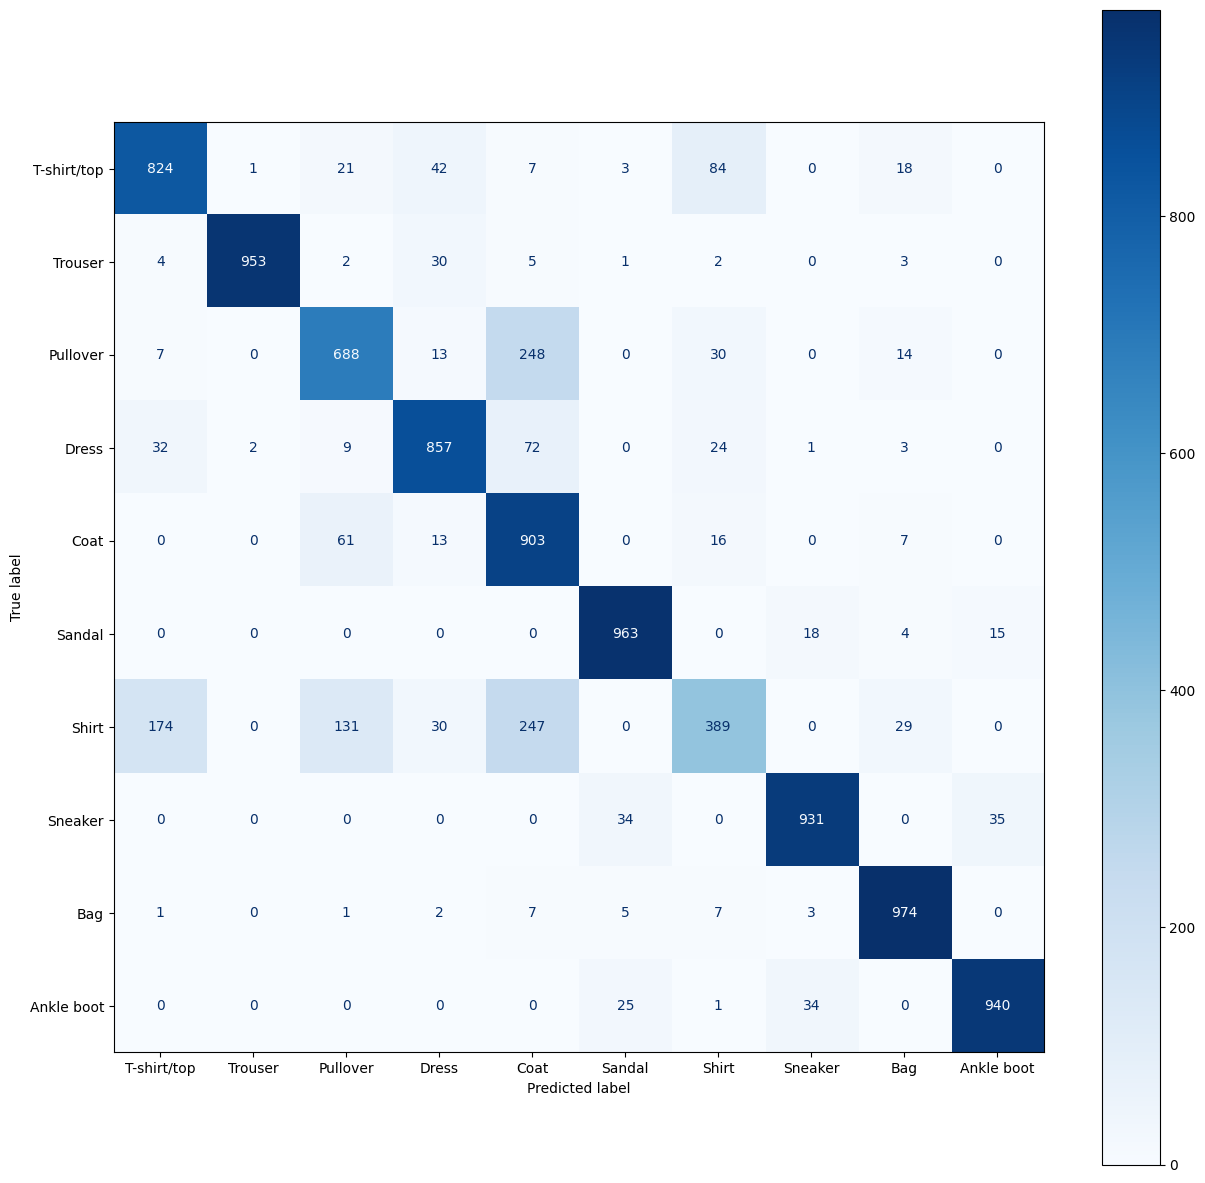

In [ ]:
#plot sklearn's confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix=ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap="Blues")

fig=conf_matrix.figure_
fig.set_figwidth(15)
fig.set_figheight(15)


In [ ]:
predictions_norm=model_c3.predict(test_data_norm) # Make some predictions with our model

313/313 [==============================] - 1s 3ms/step


In [ ]:
predictions_norm[0]

array([7.5033775e-08, 5.3061511e-22, 6.2824530e-11, 9.3021042e-16,
       7.9194805e-08, 5.7723939e-01, 1.2611847e-07, 6.1718203e-02,
       4.9040434e-03, 3.5613811e-01], dtype=float32)

In [ ]:
cm_norm=confusion_matrix(test_labels, tf.argmax(predictions_norm, axis= 1)) # Convert all of the prediction probabilities into integers

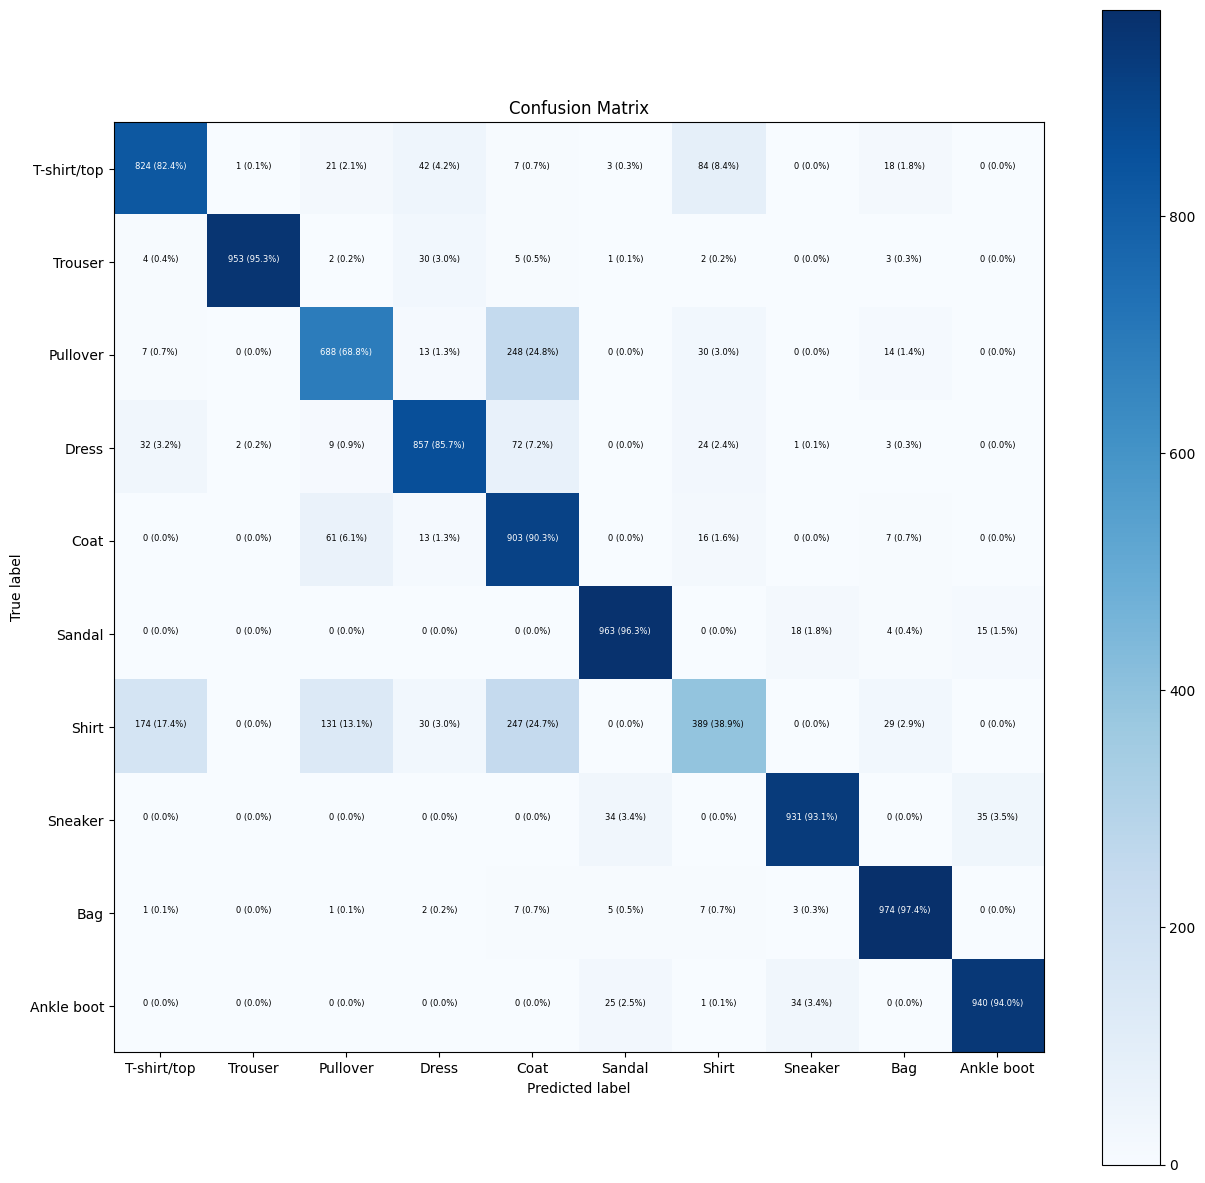

In [ ]:
make_confusion_matrix(test_labels, tf.argmax(predictions2,axis=1), class_names, figsize=(15,15), text_size=6) #plot our own confusion matrix

In [ ]:
# function to plot predictions
def plot_random_predictions(test_data, predictions, class_names, size):
  plt.figure(figsize=size)
  for i in range(10):
    ax=plt.subplot(5, 2, i+1)
    rand_index=random.choice(range(len(test_data)))
    plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[tf.argmax(predictions, axis=1)[rand_index]])
    plt.axis(False)

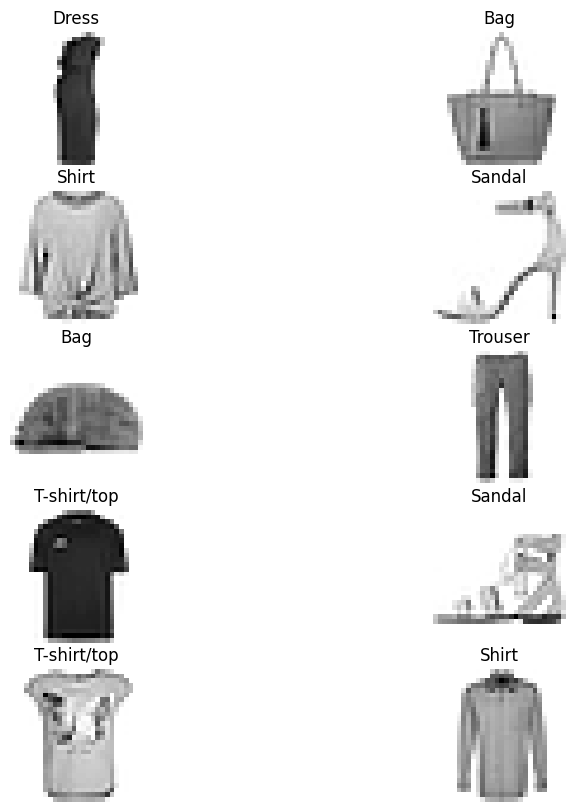

In [ ]:
plot_random_predictions(test_data, predictions_norm, class_names, (10,10))

# What patterns is our model learning?

In [ ]:
model_c3.layers # Find the layers of our most recent model

In [ ]:
# Get the patterns of a layer in our network
weights, biases= model_c3.layers[1].get_weights()

weights, weights.shape

(array([[ 0.07334284, -0.2119035 ,  0.06983157, -0.09785794],
        [-0.323156  ,  0.02512362, -0.07900064, -0.20704381],
        [-0.03417666, -0.48887876, -0.08439539,  0.18827498],
        ...,
        [-0.10591508, -0.11529604, -0.08622028,  0.13836285],
        [-0.08419793,  0.1968311 ,  0.05580069,  0.01968119],
        [ 0.19348522, -0.15070397,  0.07890627,  0.15839738]],
       dtype=float32),
 (784, 4))

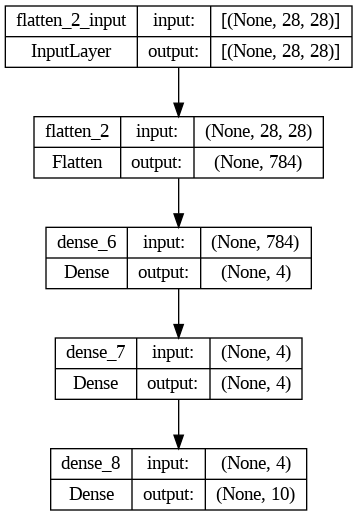

In [ ]:
#plot the model with layer shapes
from tensorflow.keras.utils import plot_model

plot_model(model_c3, show_shapes=True)